In [1]:
import scanpy as sc 
from samap.mapping import SAMAP
from samap.analysis import (get_mapping_scores, GenePairFinder,
                            sankey_plot, chord_plot, CellTypeTriangles, 
                            ParalogSubstitutions, FunctionalEnrichment,
                            convert_eggnog_to_homologs, GeneTriangles)
from samalg import SAM
from samap.utils import save_samap
from samap.utils import load_samap
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import pickle
import holoviews as hv
import anndata

/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
human_hy_15k = sc.read_h5ad('human_hy_15k.h5ad')
mouse_placenta_uterus_HY = sc.read_h5ad('mouse_placenta_uterus_HY.h5ad')
seahorse_symbol = sc.read_h5ad('seahorse_symbol.h5ad')

In [11]:
human_hy_15k.X

array([[-0.03292738, -0.13970635, -0.1560992 , ..., -0.00733067,
        -0.00687406, -0.00623899],
       [-0.03292738, -0.13970635, -0.1560992 , ..., -0.00733067,
        -0.00687406, -0.00623899],
       [-0.03292738, -0.13970635, -0.1560992 , ..., -0.00733067,
        -0.00687406, -0.00623899],
       ...,
       [-0.03292738, -0.13970635, -0.1560992 , ..., -0.00733067,
        -0.00687406, -0.00623899],
       [-0.03292738, -0.13970635, -0.1560992 , ..., -0.00733067,
        -0.00687406, -0.00623899],
       [-0.03292738, -0.13970635, -0.1560992 , ..., -0.00733067,
        -0.00687406, -0.00623899]])

In [7]:
fn1 = 'human_hy_15k.h5ad'
fn2 = 'mouse_placenta_uterus_HY.h5ad'
fn3 = 'seahorse_symbol.h5ad'

filenames = {'hs':fn1,'mm':fn2,'hc':fn3}
keys = {'hs':'ident','mm':'ident','hc':'ident'}

In [ ]:
sm = SAMAP(
        filenames,
        f_maps = 'example_data/maps/',
        keys=keys,
        save_processed=True #if False, do not save the processed results to `*_pr.h5ad`
    )

sm.run(pairwise=True,ncpus=20)

In [ ]:
save_samap(sm, 'hyaline.SAMap_alignment.h5ad')

In [27]:
fn2 = 'mouse_placenta_uterus_HY.h5ad'
fn3 = 'seahorse_symbol.h5ad'

filenames = {'mm':fn2,'hc':fn3}
keys = {'mm':'ident','hc':'ident'}
sm = SAMAP(
        filenames,
        f_maps = './ref_cds/maps/',
        keys=keys,
        save_processed=True #if False, do not save the processed results to `*_pr.h5ad`
            )

Processing data mm from:
mouse_placenta_uterus_HY.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.810203512120062
Iteration: 2, Convergence: 0.010332160015225925
Computing the UMAP embedding...
Elapsed time: 155.01505780220032 seconds
Not updating the manifold...


/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/Samap/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/Samap/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'stage' as categorical
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/Samap/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in p

Processing data hc from:
seahorse_symbol.h5ad


ValueError: Length of passed value for var_names is 1876, but this AnnData has shape: (15858, 18559)

In [18]:
help(SAMAP)

Help on class SAMAP in module samap.mapping:

class SAMAP(builtins.object)
 |  SAMAP(sams: dict, f_maps: Union[str, NoneType] = 'maps/', names: Union[dict, NoneType] = None, keys: Union[dict, NoneType] = None, resolutions: Union[dict, NoneType] = None, gnnm: Union[tuple, NoneType] = None, save_processed: Union[bool, NoneType] = True, eval_thr: Union[float, NoneType] = 1e-06)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sams: dict, f_maps: Union[str, NoneType] = 'maps/', names: Union[dict, NoneType] = None, keys: Union[dict, NoneType] = None, resolutions: Union[dict, NoneType] = None, gnnm: Union[tuple, NoneType] = None, save_processed: Union[bool, NoneType] = True, eval_thr: Union[float, NoneType] = 1e-06)
 |      Initializes and preprocess data structures for SAMap algorithm.
 |      
 |      Parameters
 |      ----------
 |      sams : dict of string OR SAM
 |          Dictionary of (indexed by species IDs):
 |          The path to an unprocessed '.h5ad' `AnnData` object fo

In [42]:
raw_seahorse_symbol = seahorse_symbol.raw.to_adata()

In [64]:
raw_var = pd.DataFrame(index=raw_seahorse_symbol.var['_index'].to_list())
raw_var['features'] = raw_seahorse_symbol.var['_index'].to_list()

In [68]:
raw_write =   anndata.AnnData(X=seahorse_symbol.raw.X,obs=seahorse_symbol.obs,var=raw_var)

In [69]:
raw_write.write('seahorse_symbol_raw.h5ad')

/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/Samap/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/Samap/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/Samap/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in p

In [14]:
raw_human_hy_15k = human_hy_15k.raw.to_adata()

raw_write =   anndata.AnnData(X=human_hy_15k.raw.X,obs=human_hy_15k.obs,var=raw_human_hy_15k.var)

raw_write.write('human_hy_15k_raw.h5ad')

## seahorse $ mouse

In [ ]:
fn1 = 'seahorse_symbol_raw.h5ad'
fn2 = 'mouse_placenta_uterus_HY.h5ad'

filenames = {'hc':fn1,'mm':fn2}
keys = {'hc':'ident','mm':'ident'}
sm = SAMAP(
        filenames,
        f_maps = './ref_cds/maps/',
        keys=keys,
        save_processed=True #if False, do not save the processed results to `*_pr.h5ad`
            )

Processing data hc from:
seahorse_symbol_raw.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7066360980368926
Iteration: 2, Convergence: 0.031057466993557544


In [ ]:
sm.run(pairwise=True,ncpus=20)

In [ ]:
save_samap(sm, 'seahorse_mouse_SAMap_alignment')

In [56]:
#https://github.com/pandas-dev/pandas/issues/56825
with open('seahorse_mouse_SAMap_alignment.pkl','rb') as f:
    #sm = pickle.load(f)
    sm = pd.read_pickle(f) 

In [57]:
keys = {'hc':'ident','mm':'ident'}
D,MappingTable = get_mapping_scores(sm,keys,n_top = 0)
MappingTable.to_csv('seahorse_mouse_MappingTable_0.txt', sep='\t')

In [58]:
#sankey plot
#https://github.com/flatironinstitute/CaImAn/issues/1140
a=sankey_plot(MappingTable, align_thr=0.2, species_order = ['mm','hc'])
hv.extension('matplotlib')
#hv.save(a, filename="seahorse_mouse_sankey_0.15.html")
hv.save(a, filename='seahorse_mouse_sankey_0.2.pdf', fmt='pdf')

#github.com/holoviz/holoviews/issues/1819
renderer = hv.renderer('bokeh')

# Using renderer save
renderer.save(a, 'seahorse_mouse_sankey_0.2.html')

/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWa

In [59]:
select_list = ['mm_M_EPC','mm_M_TGC','mm_M_pTGC','hc_S_TGC(cxcl14)','hc_S_TGC(muc5)','hc_S_TGC(nucb2)','hc_S_decidual']
select_MappingTable=MappingTable.loc[select_list,select_list]

In [60]:
select_MappingTable

,mm_M_EPC,mm_M_TGC,mm_M_pTGC,hc_S_TGC(cxcl14),hc_S_TGC(muc5),hc_S_TGC(nucb2),hc_S_decidual
mm_M_EPC,0.000000,0.000000,0.000000,0.000000,0.000926,0.050310,0.389858
mm_M_TGC,0.000000,0.000000,0.000000,0.000546,0.002173,0.061865,0.229829
mm_M_pTGC,0.000000,0.000000,0.000000,0.000903,0.188876,0.167896,0.613682
hc_S_TGC(cxcl14),0.000000,0.000546,0.000903,0.000000,0.000000,0.000000,0.000000
hc_S_TGC(muc5),0.000926,0.002173,0.188876,0.000000,0.000000,0.000000,0.000000
hc_S_TGC(nucb2),0.050310,0.061865,0.167896,0.000000,0.000000,0.000000,0.000000
hc_S_decidual,0.389858,0.229829,0.613682,0.000000,0.000000,0.000000,0.000000


In [61]:
#sankey plot
#https://github.com/flatironinstitute/CaImAn/issues/1140
a=sankey_plot(select_MappingTable, align_thr=0.2, species_order = ['mm','hc'])
hv.extension('matplotlib')
#hv.save(a, filename="seahorse_mouse_sankey_0.15.html")
hv.save(a, filename='seahorse_mouse_select_sankey_0.2.pdf', fmt='pdf')

#github.com/holoviz/holoviews/issues/1819
renderer = hv.renderer('bokeh')

# Using renderer save
renderer.save(a, 'seahorse_mouse_select_sankey_0.2.html')

/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWa

In [53]:
#Calculating table of enriched gene pairs for cell type mappings with an alignment score above 0.4:
gpf = GenePairFinder(sm,keys=keys)
gene_pairs = gpf.find_all(align_thr=0.1)
gene_pairs.to_csv('seahorse_mouse_SAMap_gene_pairs.txt',  sep='\t')

Finding cluster-specific markers in hc:ident.
Finding cluster-specific markers in mm:ident.
Calculating gene pairs for the mapping: hc;S_FB to mm;M_FB
Calculating gene pairs for the mapping: hc;S_SMC to mm;M_PC
Calculating gene pairs for the mapping: hc;S_SMC to mm;M_SMC
Calculating gene pairs for the mapping: hc;S_TGC(cxcl14) to mm;M_FB
Calculating gene pairs for the mapping: hc;S_TGC(muc5) to mm;M_EC
Calculating gene pairs for the mapping: hc;S_TGC(muc5) to mm;M_pTGC
Calculating gene pairs for the mapping: hc;S_TGC(nucb2) to mm;M_FB
Calculating gene pairs for the mapping: hc;S_TGC(nucb2) to mm;M_pTGC
Calculating gene pairs for the mapping: hc;S_basal to mm;M_EC
Calculating gene pairs for the mapping: hc;S_basal to mm;M_ES
Calculating gene pairs for the mapping: hc;S_basal to mm;M_FB
Calculating gene pairs for the mapping: hc;S_basal to mm;M_TGC
Calculating gene pairs for the mapping: hc;S_decidual to mm;M_Ds
Calculating gene pairs for the mapping: hc;S_decidual to mm;M_EC
Calculating

## seahorse & human

In [16]:
fn1 = 'seahorse_symbol_raw.h5ad'
fn2 = 'human_hy_15k_raw.h5ad'

filenames = {'hc':fn1,'hs':fn2}
keys = {'hc':'ident','hs':'ident'}
sm = SAMAP(
        filenames,
        f_maps = './ref_cds/maps/',
        keys=keys,
        save_processed=True #if False, do not save the processed results to `*_pr.h5ad`
            )

Processing data hc from:
seahorse_symbol_raw.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7066360980368926
Iteration: 2, Convergence: 0.031057466993557544
Computing the UMAP embedding...


/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Elapsed time: 154.6642575263977 seconds
Not updating the manifold...
Processing data hs from:
human_hy_15k_raw.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.889806062274486
Computing the UMAP embedding...


/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Elapsed time: 103.58680391311646 seconds
Not updating the manifold...
12551 `hc` gene symbols match between the datasets and the BLAST graph.
15396 `hs` gene symbols match between the datasets and the BLAST graph.


In [17]:
sm.run(pairwise=True,ncpus=20)

Prepping datasets for translation.
Translating feature spaces pairwise.
Projecting data into joint latent space. 22.568087577819824
Correcting data with means. 34.8997802734375
Expanding neighbourhoods of species hc...
Expanding neighbourhoods of species hs...
Indegree coarsening
0/2 (0, 31413)
1/2 (20000, 31413)
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 1 complete.
Alignment scores:
         hc        hs
hc  0.00000  0.513402
hs  0.58762  0.000000
Calculating gene-gene correlations in the homology graph...
Prepping datasets for translation.
Translating feature spaces pairwise.
Projecting data into joint latent space. 19.568576097488403
Correcting data with means. 31.375948429107666
Expanding neighbourhoods of species hc...
Expanding neighbourhoods of species hs...
Indegree coarsening
0/2 (0, 31413)
1/2 (20000, 31413)
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 2 complete.
Alignment scores:
  

In [18]:
save_samap(sm, 'seahorse_human_SAMap_alignment')

In [62]:
#https://github.com/pandas-dev/pandas/issues/56825
with open('seahorse_human_SAMap_alignment.pkl','rb') as f:
    #sm = pickle.load(f)
    sm = pd.read_pickle(f) 

In [63]:
sm

In [64]:
keys = {'hc':'ident','hs':'ident'}
D,MappingTable = get_mapping_scores(sm,keys,n_top = 0)
MappingTable.to_csv('seahorse_human_MappingTable_0.txt', sep='\t')

In [65]:
#sankey plot
#https://github.com/flatironinstitute/CaImAn/issues/1140
a=sankey_plot(MappingTable, align_thr=0.2, species_order = ['hs','hc'])
hv.extension('matplotlib')
#hv.save(a, filename="seahorse_mouse_sankey_0.15.html")
hv.save(a, filename='seahorse_human_sankey_0.2.pdf', fmt='pdf')

#github.com/holoviz/holoviews/issues/1819
renderer = hv.renderer('bokeh')

# Using renderer save
renderer.save(a, 'seahorse_human_sankey_0.2.html')

/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWa

In [66]:
select_list = ['hs_H_EVT','hs_H_SCT','hs_H_VCT','hc_S_TGC(cxcl14)','hc_S_TGC(muc5)','hc_S_TGC(nucb2)','hc_S_decidual']
select_MappingTable=MappingTable.loc[select_list,select_list]

In [67]:
select_MappingTable

,hs_H_EVT,hs_H_SCT,hs_H_VCT,hc_S_TGC(cxcl14),hc_S_TGC(muc5),hc_S_TGC(nucb2),hc_S_decidual
hs_H_EVT,0.000000,0.000000,0.000000,0.442629,0.288317,0.110435,0.131737
hs_H_SCT,0.000000,0.000000,0.000000,0.184266,0.031037,0.048133,0.320410
hs_H_VCT,0.000000,0.000000,0.000000,0.023590,0.193931,0.219172,0.350839
hc_S_TGC(cxcl14),0.442629,0.184266,0.023590,0.000000,0.000000,0.000000,0.000000
hc_S_TGC(muc5),0.288317,0.031037,0.193931,0.000000,0.000000,0.000000,0.000000
hc_S_TGC(nucb2),0.110435,0.048133,0.219172,0.000000,0.000000,0.000000,0.000000
hc_S_decidual,0.131737,0.320410,0.350839,0.000000,0.000000,0.000000,0.000000


In [68]:
a=sankey_plot(select_MappingTable, align_thr=0.2, species_order = ['hs','hc'])
hv.extension('matplotlib')
hv.save(a, filename="seahorse_human_select_sankey_0.2.html")
hv.save(a, filename='seahorse_human_select_sankey_0.2.pdf', fmt='pdf')

/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWa

In [69]:
#github.com/holoviz/holoviews/issues/1819
renderer = hv.renderer('bokeh')

# Using renderer save
renderer.save(a, 'seahorse_human_select_sankey_0.2.html')


/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWa

In [50]:
#Calculating table of enriched gene pairs for cell type mappings with an alignment score above 0.4:
gpf = GenePairFinder(sm,keys=keys)
gene_pairs = gpf.find_all(align_thr=0.1)
gene_pairs.to_csv('seahorse_human_SAMap_gene_pairs.txt',  sep='\t')


Finding cluster-specific markers in hc:ident.
Finding cluster-specific markers in hs:ident.
Calculating gene pairs for the mapping: hc;S_FB to hs;H_Ds
Calculating gene pairs for the mapping: hc;S_FB to hs;H_FB
Calculating gene pairs for the mapping: hc;S_SMC to hs;H_Ds
Calculating gene pairs for the mapping: hc;S_TGC(cxcl14) to hs;H_EVT
Calculating gene pairs for the mapping: hc;S_TGC(cxcl14) to hs;H_SCT
Calculating gene pairs for the mapping: hc;S_TGC(muc5) to hs;H_EVT
Calculating gene pairs for the mapping: hc;S_TGC(muc5) to hs;H_VCT
Calculating gene pairs for the mapping: hc;S_TGC(muc5) to hs;H_immune
Calculating gene pairs for the mapping: hc;S_TGC(nucb2) to hs;H_EVT
Calculating gene pairs for the mapping: hc;S_TGC(nucb2) to hs;H_HB
Calculating gene pairs for the mapping: hc;S_TGC(nucb2) to hs;H_VCT
Calculating gene pairs for the mapping: hc;S_TGC(nucb2) to hs;H_immune
Calculating gene pairs for the mapping: hc;S_basal to hs;H_VCT
Calculating gene pairs for the mapping: hc;S_basal 

In [107]:
seahorse_human_SAMap_gene_pairs = pd.read_csv('seahorse_human_SAMap_gene_pairs.txt',  sep='\t',index_col=0)
seahorse_mouse_SAMap_gene_pairs = pd.read_csv('seahorse_mouse_SAMap_gene_pairs.txt',  sep='\t',index_col=0)

In [81]:
seahorse_human_SAMap_gene_pairs

,hc_S_FB;hs_H_Ds,hc_S_FB;hs_H_Ds_pval1,hc_S_FB;hs_H_Ds_pval2,hc_S_FB;hs_H_FB,hc_S_FB;hs_H_FB_pval1,hc_S_FB;hs_H_FB_pval2,hc_S_SMC;hs_H_Ds,hc_S_SMC;hs_H_Ds_pval1,hc_S_SMC;hs_H_Ds_pval2,hc_S_TGC(cxcl14);hs_H_EVT,...,hc_S_outer(lectin);hs_H_VCT_pval2,hc_S_outer(lectin);hs_H_immune,hc_S_outer(lectin);hs_H_immune_pval1,hc_S_outer(lectin);hs_H_immune_pval2,hc_S_progenitor;hs_H_EVT,hc_S_progenitor;hs_H_EVT_pval1,hc_S_progenitor;hs_H_EVT_pval2,hc_S_progenitor;hs_H_VCT,hc_S_progenitor;hs_H_VCT_pval1,hc_S_progenitor;hs_H_VCT_pval2
0,hc_crabp1a;hs_RBP1,1.002524e-90,0.0,hc_sfrp2;hs_FRZB,1.034712e-197,0.000000e+00,hc_tagln;hs_TAGLN,4.909056e-50,0.000000e+00,hc_col4a5;hs_COL4A2,...,0.0,hc_samhd1;hs_SAMHD1,5.603235e-33,5.716023e-124,hc_fn1b;hs_FN1,0.000000e+00,0.000000e+00,hc_lamb2l;hs_LAMA5,0.000000e+00,2.731528e-97
1,hc_cpxm1a;hs_CPXM1,5.200055e-110,0.0,hc_col5a1;hs_COL3A1,0.000000e+00,0.000000e+00,hc_acta2;hs_ACTA2,1.060767e-58,0.000000e+00,hc_itga6b;hs_ITGA5,...,0.0,hc_pibf1;hs_KLF6,5.421194e-75,5.024918e-199,hc_cldni;hs_CLDN19,0.000000e+00,4.181566e-161,hc_lamb2l;hs_LAMC1,0.000000e+00,5.514901e-42
2,hc_thbs4b;hs_LTBP4,3.253389e-89,0.0,hc_col6a1;hs_COL3A1,3.417347e-172,0.000000e+00,hc_tagln;hs_CNN1,4.909056e-50,5.737906e-48,hc_col4a5;hs_COL4A1,...,0.0,hc_pibf1;hs_KLF2,5.421194e-75,6.886093e-108,hc_itga6b;hs_ITGA5,0.000000e+00,0.000000e+00,hc_EFEMP1;hs_FBN2,1.108501e-63,0.000000e+00
3,hc_dkk2;hs_DKK1,4.838311e-03,0.0,hc_col5a1;hs_COL14A1,0.000000e+00,0.000000e+00,hc_cd248a;hs_FBLN2,6.841135e-47,0.000000e+00,hc_krt97;hs_KRT19,...,0.0,hc_rgs2;hs_RGS1,2.497084e-10,0.000000e+00,hc_cldn1;hs_CLDN19,8.863944e-199,4.181566e-161,hc_fat2;hs_CDH1,1.992137e-121,3.533781e-168
4,hc_aldh1a2;hs_ALDH1A1,1.848326e-70,0.0,hc_fbn2b;hs_DLK1,4.129761e-57,0.000000e+00,hc_cd248a;hs_LTBP4,6.841135e-47,0.000000e+00,hc_krt97;hs_KRT7,...,0.0,hc_arhgef18a;hs_ARHGEF1,5.619203e-34,0.000000e+00,hc_ptk2bb;hs_FLT1,1.954482e-298,0.000000e+00,hc_itgb4;hs_ITGB4,0.000000e+00,9.249987e-78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,NaN,NaN,NaN,hc_fbln1;hs_NOTCH2,3.844603e-04,1.017945e-10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,NaN,NaN,NaN,hc_fhl3a;hs_FHL1,6.948950e-03,9.254048e-34,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
seahorse_mouse_SAMap_gene_pairs

,hc_S_FB;mm_M_FB,hc_S_FB;mm_M_FB_pval1,hc_S_FB;mm_M_FB_pval2,hc_S_SMC;mm_M_PC,hc_S_SMC;mm_M_PC_pval1,hc_S_SMC;mm_M_PC_pval2,hc_S_SMC;mm_M_SMC,hc_S_SMC;mm_M_SMC_pval1,hc_S_SMC;mm_M_SMC_pval2,hc_S_TGC(cxcl14);mm_M_FB,...,hc_S_outer(lectin);mm_M_EC_pval2,hc_S_outer(lectin);mm_M_EPC,hc_S_outer(lectin);mm_M_EPC_pval1,hc_S_outer(lectin);mm_M_EPC_pval2,hc_S_outer(lectin);mm_M_pTGC,hc_S_outer(lectin);mm_M_pTGC_pval1,hc_S_outer(lectin);mm_M_pTGC_pval2,hc_S_progenitor;mm_M_FB,hc_S_progenitor;mm_M_FB_pval1,hc_S_progenitor;mm_M_FB_pval2
0,hc_col5a1;mm_Col1a1,0.000000e+00,0.000000e+00,hc_rgs5a;mm_Rgs4,7.592494e-87,7.049251e-75,hc_acta2;mm_Actg2,1.060767e-58,2.682609e-41,hc_cxcl14;mm_Cxcl14,...,2.186867e-27,hc_zbtb7b;mm_Hic2,2.273188e-57,2.459478e-205,hc_krt99;mm_Krt8,9.069651e-266,0.000000e+00,hc_fn1b;mm_Mmp2,0.0,0.000000e+00
1,hc_col5a1;mm_Col3a1,0.000000e+00,0.000000e+00,hc_cd248a;mm_Notch3,6.841135e-47,2.103003e-100,hc_tagln;mm_Cnn1,4.909056e-50,2.560918e-38,hc_col4a5;mm_Col18a1,...,3.301526e-168,hc_satb1b;mm_Satb1,1.080490e-47,7.915567e-218,hc_FAM83G;mm_Fam83f,7.420025e-67,3.733043e-53,hc_fn1b;mm_Fn1,0.0,0.000000e+00
2,hc_col5a1;mm_Col1a2,0.000000e+00,0.000000e+00,hc_acta2;mm_Acta2,1.060767e-58,1.295437e-111,hc_myh11a;mm_Myh11,7.320229e-47,1.481961e-53,hc_col4a5;mm_Col4a5,...,2.186867e-27,hc_pkp1b;mm_Pkp2,1.285597e-13,7.587599e-54,hc_pkp1b;mm_Pkp2,1.285597e-13,4.426852e-146,hc_lamb2l;mm_Lama2,0.0,0.000000e+00
3,hc_col5a1;mm_Col6a1,0.000000e+00,0.000000e+00,hc_myh11a;mm_Myh11,7.320229e-47,5.584903e-105,hc_acta2;mm_Acta2,1.060767e-58,7.870929e-64,hc_mmp30;mm_Mmp2,...,2.261667e-07,hc_stk10;mm_Nrk,1.518356e-24,1.437398e-297,hc_krt99;mm_Krt19,9.069651e-266,0.000000e+00,hc_mmp30;mm_Mmp2,0.0,0.000000e+00
4,hc_col5a1;mm_Col6a2,0.000000e+00,0.000000e+00,hc_rgs5a;mm_Rgs5,7.592494e-87,2.667215e-77,hc_acta2;mm_Acta1,1.060767e-58,1.874113e-11,hc_col4a5;mm_Col7a1,...,6.953300e-64,hc_krt99;mm_Krt8,9.069651e-266,1.145863e-150,hc_krt97;mm_Krt7,9.045437e-254,0.000000e+00,hc_lamb2l;mm_Tenm3,0.0,6.382565e-140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,hc_kirrel1a;mm_Hmcn2,1.488037e-05,5.601393e-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,hc_rhoab;mm_Rhoc,1.557000e-15,7.656678e-175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,hc_igsf10;mm_Lrrn2,5.812216e-10,1.465542e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,hc_FBN1;mm_Hmcn1,2.782668e-25,7.229635e-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## epi

In [84]:
human_choose_type = 'hc_S_TGC(cxcl14);hs_H_EVT'
mouse_choose_type = 'hc_S_TGC(cxcl14);mm_M_FB'

In [121]:
seahorse_human_SAMap_gene_pairs.loc[:,['hc_S_TGC(cxcl14);hs_H_EVT']]

,hc_S_TGC(cxcl14);hs_H_EVT
0,hc_col4a5;hs_COL4A2
1,hc_itga6b;hs_ITGA5
2,hc_col4a5;hs_COL4A1
3,hc_krt97;hs_KRT19
4,hc_krt97;hs_KRT7
...,...
902,NaN
903,NaN
904,NaN
905,NaN


In [122]:
#human_choose_gene = seahorse_human_SAMap_gene_pairs.loc[:,[i.split(';')[0] ==  choose_type for i in seahorse_human_SAMap_gene_pairs.columns]]
human_choose_gene = seahorse_human_SAMap_gene_pairs.loc[:,['hc_S_TGC(cxcl14);hs_H_EVT']]
#human_choose_gene = human_choose_gene.iloc[:,[0,3]]
human_choose_gene = human_choose_gene.melt()['value'].dropna()
human_choose_gene = [i.split(';')[1][3:] for i in human_choose_gene]

In [123]:
pd.DataFrame(human_choose_gene).to_csv('hc_S_TGC(cxcl14)_human.csv')

In [124]:
#mouse_choose_gene = seahorse_mouse_SAMap_gene_pairs.loc[:,[i.split(';')[0] ==  choose_type for i in seahorse_mouse_SAMap_gene_pairs.columns]]
mouse_choose_gene = seahorse_mouse_SAMap_gene_pairs.loc[:,['hc_S_TGC(cxcl14);mm_M_FB']]
#mouse_choose_gene = mouse_choose_gene.iloc[:,[0]]
#mouse_choose_gene = mouse_choose_gene.melt()['value'].dropna()
mouse_choose_gene = [i.split(';')[1][3:] for i in mouse_choose_gene]

In [126]:
pd.DataFrame(mouse_choose_gene).to_csv('hc_S_TGC(cxcl14)_mouse.csv')

In [188]:
human_choose_type = 'hc_S_TGC(muc5);hs_H_EVT'
mouse_choose_type = 'hc_S_TGC(muc5);mm_M_EC'

In [189]:
human_choose_gene = seahorse_human_SAMap_gene_pairs.loc[:,human_choose_type]
#human_choose_gene = human_choose_gene.melt()['value'].dropna()
human_choose_gene = [i.split(';')[1][3:] for i in human_choose_gene.dropna()]
pd.DataFrame(human_choose_gene).to_csv('hc_S_TGC(muc5)_human.csv')

In [190]:
mouse_choose_gene = seahorse_mouse_SAMap_gene_pairs.loc[:,mouse_choose_type]
#mouse_choose_gene = mouse_choose_gene.melt()['value'].dropna()
mouse_choose_gene = [i.split(';')[1][3:] for i in mouse_choose_gene.dropna()]
pd.DataFrame(mouse_choose_gene).to_csv('hc_S_TGC(muc5)_mouse.csv')

In [191]:
human_choose_type = 'hc_S_TGC(nucb2);hs_H_VCT'
#mouse_choose_type = 'hc_S_TGC(muc5);mm_M_EC'

In [192]:
human_choose_gene = seahorse_human_SAMap_gene_pairs.loc[:,human_choose_type]
#human_choose_gene = human_choose_gene.melt()['value'].dropna()
human_choose_gene = [i.split(';')[1][3:] for i in human_choose_gene.dropna()]
pd.DataFrame(human_choose_gene).to_csv('hc_S_TGC(nucb2)_human.csv')

In [193]:
human_choose_type =[ 'hc_S_decidual;hs_H_SCT','hc_S_decidual;hs_H_VCT']
mouse_choose_type = ['hc_S_decidual;mm_M_EPC','hc_S_decidual;mm_M_pTGC']

In [194]:
human_choose_gene = seahorse_human_SAMap_gene_pairs.loc[:,human_choose_type]
human_choose_gene = human_choose_gene.melt()['value'].dropna()
human_choose_gene = [i.split(';')[1][3:] for i in human_choose_gene.dropna()]
pd.DataFrame(human_choose_gene).to_csv('hc_S_decidual_human.csv')

In [195]:
mouse_choose_gene = seahorse_mouse_SAMap_gene_pairs.loc[:,mouse_choose_type]
mouse_choose_gene = mouse_choose_gene.melt()['value'].dropna()
mouse_choose_gene = [i.split(';')[1][3:] for i in mouse_choose_gene.dropna()]
pd.DataFrame(mouse_choose_gene).to_csv('hc_S_decidual_mouse.csv')

## immu

In [196]:
human_choose_type = 'hc_S_immune;hs_H_immune'
mouse_choose_type = 'hc_S_immune;mm_M_immune'

In [197]:
human_choose_gene = seahorse_human_SAMap_gene_pairs.loc[:,human_choose_type]
#human_choose_gene = human_choose_gene.melt()['value'].dropna()
human_choose_gene = [i.split(';')[1][3:] for i in human_choose_gene.dropna()]
pd.DataFrame(human_choose_gene).to_csv('hc_S_immune_human.csv')

mouse_choose_gene = seahorse_mouse_SAMap_gene_pairs.loc[:,mouse_choose_type]
#mouse_choose_gene = mouse_choose_gene.melt()['value'].dropna()
mouse_choose_gene = [i.split(';')[1][3:] for i in mouse_choose_gene.dropna()]
pd.DataFrame(mouse_choose_gene).to_csv('hc_S_immune_mouse.csv')

In [198]:
human_choose_type = 'hc_S_FB;hs_H_FB'
mouse_choose_type = 'hc_S_FB;mm_M_FB'

In [199]:
human_choose_gene = seahorse_human_SAMap_gene_pairs.loc[:,human_choose_type]
#human_choose_gene = human_choose_gene.melt()['value'].dropna()
human_choose_gene = [i.split(';')[1][3:] for i in human_choose_gene.dropna()]
pd.DataFrame(human_choose_gene).to_csv('hc_S_FB_human.csv')

mouse_choose_gene = seahorse_mouse_SAMap_gene_pairs.loc[:,mouse_choose_type]
#mouse_choose_gene = mouse_choose_gene.melt()['value'].dropna()
mouse_choose_gene = [i.split(';')[1][3:] for i in mouse_choose_gene.dropna()]
pd.DataFrame(mouse_choose_gene).to_csv('hc_S_FB_mouse.csv')

In [200]:
human_choose_type = 'hc_S_endo;hs_H_endo'
mouse_choose_type = 'hc_S_endo;mm_M_endo'

In [201]:
human_choose_gene = seahorse_human_SAMap_gene_pairs.loc[:,human_choose_type]
#human_choose_gene = human_choose_gene.melt()['value'].dropna()
human_choose_gene = [i.split(';')[1][3:] for i in human_choose_gene.dropna()]
pd.DataFrame(human_choose_gene).to_csv('hc_S_endo_human.csv')

mouse_choose_gene = seahorse_mouse_SAMap_gene_pairs.loc[:,mouse_choose_type]
#mouse_choose_gene = mouse_choose_gene.melt()['value'].dropna()
mouse_choose_gene = [i.split(';')[1][3:] for i in mouse_choose_gene.dropna()]
pd.DataFrame(mouse_choose_gene).to_csv('hc_S_endo_mouse.csv')

In [202]:
human_choose_type =[ 'hc_S_basal;hs_H_VCT','hc_S_progenitor;hs_H_EVT']
mouse_choose_type = ['hc_S_basal;mm_M_ES','hc_S_progenitor;mm_M_FB']

In [203]:
human_choose_gene = seahorse_human_SAMap_gene_pairs.loc[:,human_choose_type]
human_choose_gene = human_choose_gene.melt()['value'].dropna()
human_choose_gene = [i.split(';')[1][3:] for i in human_choose_gene.dropna()]
pd.DataFrame(human_choose_gene).to_csv('hc_S_basal&progenitor_human.csv')

mouse_choose_gene = seahorse_mouse_SAMap_gene_pairs.loc[:,mouse_choose_type]
mouse_choose_gene = mouse_choose_gene.melt()['value'].dropna()
mouse_choose_gene = [i.split(';')[1][3:] for i in mouse_choose_gene.dropna()]
pd.DataFrame(mouse_choose_gene).to_csv('hc_S_basal&progenitor_mouse.csv')

## read

In [2]:
#https://github.com/pandas-dev/pandas/issues/56825
with open('seahorse_mouse_SAMap_alignment.pkl','rb') as f:
    #sm = pickle.load(f)
    sm = pd.read_pickle(f) 

In [5]:
smp = sm.samap

In [6]:
smp.adata.varp["homology_graph_reweighted"]

<41840x41840 sparse matrix of type '<class 'numpy.float64'>'
	with 199624 stored elements in Compressed Sparse Row format>

In [8]:
adata=smp.adata.copy()

/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/sibcb1/chenluonanlab8/miaoyuanxiang/miniforge3/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


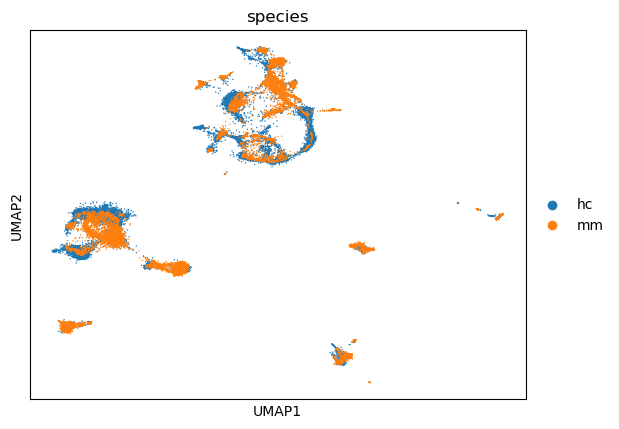

In [13]:
sc.pl.umap(adata,color=['species'])